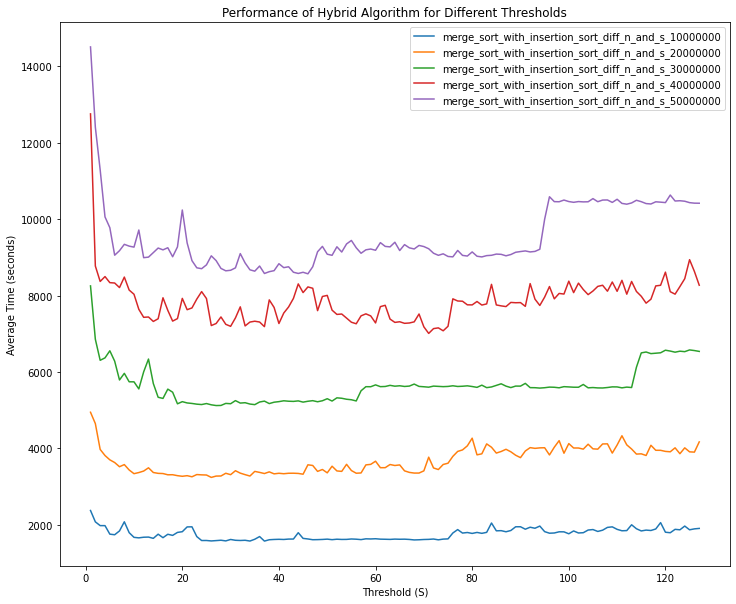

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the figure size (width, height)
plt.figure(figsize=(12, 10))

# List of filenames to read
filenames = [
    "merge_sort_with_insertion_sort_diff_n_and_s_10000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_20000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_30000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_40000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_50000000.csv",
]

# Update this path to match where you have saved the cloned GitHub repository
directory_path = (
    "/Users/rheageorge/Desktop/NTU/SC2001-Example-Class-Group7/Project1/data/"
)

# Loop through each specified CSV file
for filename in filenames:
    # Construct the complete filepath
    filepath = os.path.join(directory_path, filename)

    # Read the data from the CSV file
    data = pd.read_csv(filepath)

    # Calculate the average time across the three runs
    data["avg_time"] = (data["time1"] + data["time2"] + data["time3"]) / 3.0

    # Plot this data, using the threshold as the X-axis and the average time as the Y-axis
    plt.plot(data["threshold"], data["avg_time"], label=f"{filename.split('.')[0]}")

# Add labels and title
plt.xlabel("Threshold (S)")
plt.ylabel("Average Time (seconds)")
plt.title("Performance of Hybrid Algorithm for Different Thresholds")

# Add a legend
plt.legend()

# Show the plot
plt.show()

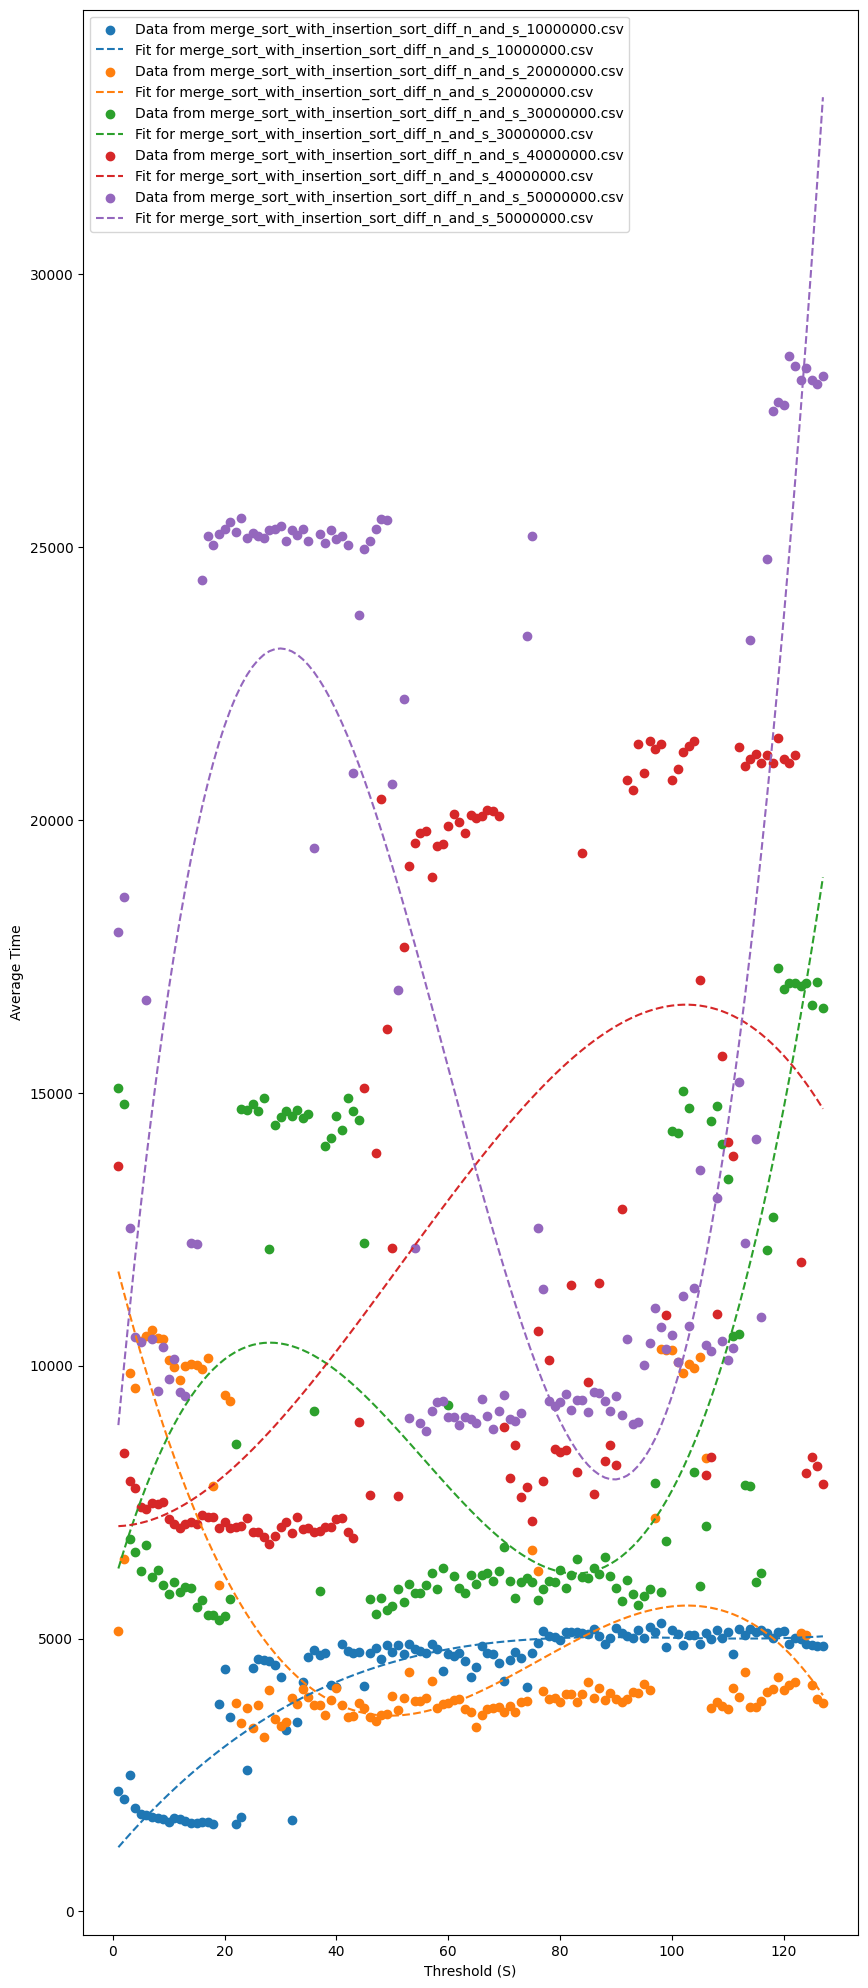

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
import numpy as np


def quadratic(x, a, b, c):
    return a * x**2 + b * x + c


# List of filenames to read
filenames = [
    "merge_sort_with_insertion_sort_diff_n_and_s_10000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_20000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_30000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_40000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_50000000.csv",
]

# Directory path
directory_path = (
    "/Users/rheageorge/Desktop/NTU/SC2001-Example-Class-Group7/Project1/data/"
)

# Create a plot
plt.figure(figsize=(10, 25))

# Loop through each specified CSV file
for filename in filenames:
    filepath = os.path.join(directory_path, filename)
    data = pd.read_csv(filepath)
    data["avg_time"] = (data["time1"] + data["time2"] + data["time3"]) / 3.0

    # Curve fitting
    params, covariance = curve_fit(quadratic, data["threshold"], data["avg_time"])

    # Generate fitted data
    x_fit = np.linspace(min(data["threshold"]), max(data["threshold"]), 500)
    y_fit = quadratic(x_fit, *params)

    plt.scatter(data["threshold"], data["avg_time"], label=f"Data from {filename}")
    plt.plot(x_fit, y_fit, linestyle="--", label=f"Fit for {filename}")

# Add labels and title
plt.xlabel("Threshold (S)")
plt.ylabel("Average Time")
plt.legend()

# Show the plot
plt.show()

In [57]:
import pandas as pd
import os
from collections import Counter

# List of filenames to read
filenames = [
    "merge_sort_with_insertion_sort_diff_n_and_s_10000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_20000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_30000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_40000000.csv",
    "merge_sort_with_insertion_sort_diff_n_and_s_50000000.csv",
]

# Update this path to match where you have saved the cloned GitHub repository
directory_path = (
    "/Users/rheageorge/Desktop/NTU/SC2001-Example-Class-Group7/Project1/data/"
)

min_total = 0

# Counter for optimal S values
optimal_s_counter = Counter()

# Loop through each specified CSV file
for filename in filenames:
    # Construct the complete filepath
    filepath = os.path.join(directory_path, filename)

    # Read the data from the CSV file
    data = pd.read_csv(filepath)

    # Calculate the average time across the three runs
    data["avg_time"] = (data["time1"] + data["time2"] + data["time3"]) / 3.0

    # Identify the S that gives minimum average time for this dataset
    best_s = data.loc[data["avg_time"].idxmin()]["threshold"]
    min_total += best_s

    # Update the counter
    optimal_s_counter[best_s] += 1

# Identify the most frequently optimal S
most_optimal_s, frequency = optimal_s_counter.most_common(1)[0]

min_total /= 5
print(min_total)

print(
    f"The most consistently optimal value of S across different dataset sizes is {most_optimal_s}, appearing {frequency} times."
)

41.4
The most consistently optimal value of S across different dataset sizes is 37.0, appearing 1 times.
